In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [23]:
import sqlite3

def read_table(table_name):
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql(query, connect)
    return data

connect = sqlite3.connect("../db.sqlite3")

order_data = read_table("restaurant_order")
product_data = read_table("restaurant_product")
orderitem_data = read_table("restaurant_orderitem")

combined_data = pd.merge(orderitem_data, order_data, left_on="order_id", right_on="id", suffixes=("_orderitem", "_order"))
combined_data = pd.merge(combined_data, product_data, left_on="product_id", right_on="id", suffixes=("_combined", "_product"))

combined_data.to_csv("combined_data.csv", index=False)
connect.close()

df = pd.read_csv("combined_data.csv")
len(df)


74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

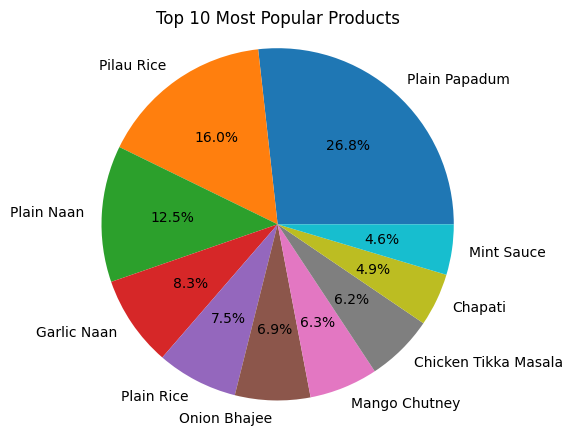

In [10]:
import matplotlib.pyplot as plt

product_sales = df.groupby("name")["quantity"].sum()

top_10_products = product_sales.nlargest(10)

plt.figure(figsize=(5, 5))
plt.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%")
plt.title("Top 10 Most Popular Products")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

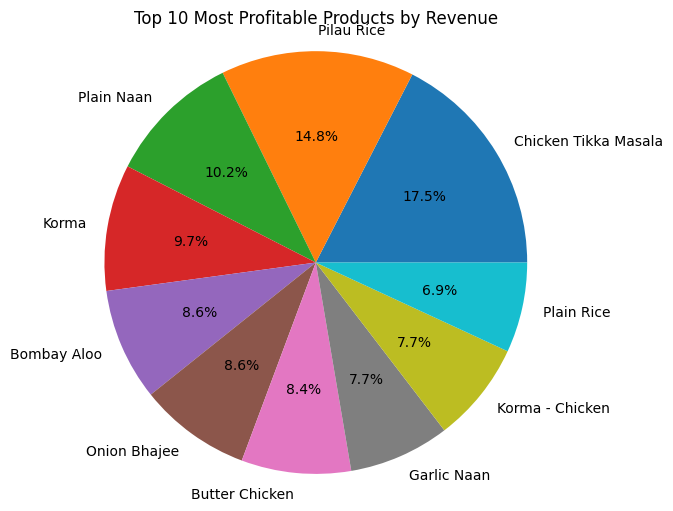

In [13]:
df["Item Price"] = df["price"] * df["quantity"]

product_revenue = df.groupby("name")["Item Price"].sum()

top_10_products_revenue = product_revenue.nlargest(10)

plt.figure(figsize=(6, 6))
plt.pie(top_10_products_revenue, labels=top_10_products_revenue.index, autopct="%1.1f%%")
plt.title("Top 10 Most Profitable Products by Revenue")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

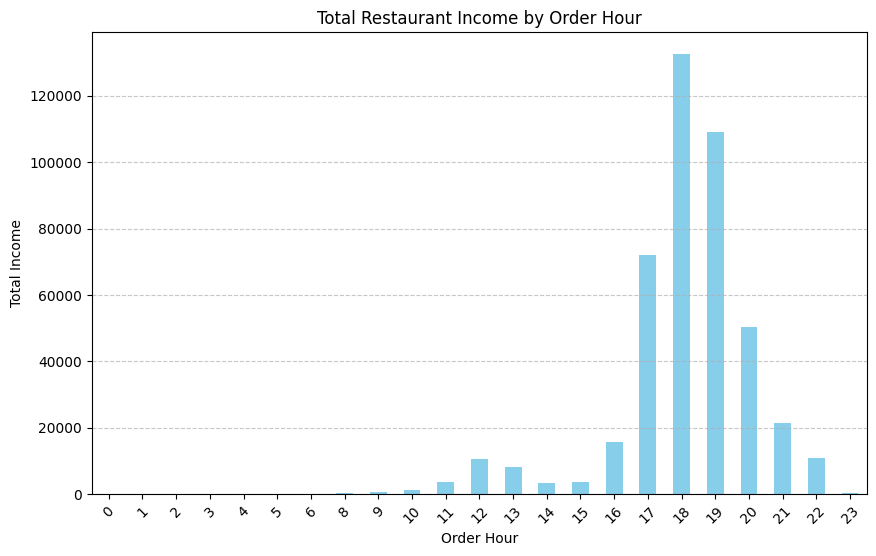

In [20]:
df["Order Hour"] = pd.to_datetime(df["order_datetime"]).dt.hour

hourly_income = df.groupby("Order Hour")["Item Price"].sum()

plt.figure(figsize=(10, 6))
hourly_income.plot(kind="bar", color="skyblue")
plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

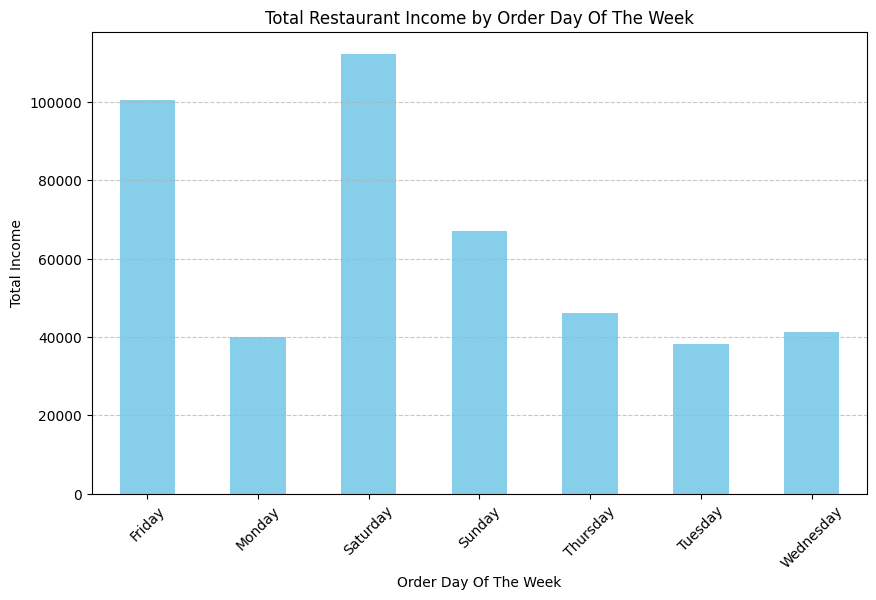

In [22]:
df["Order Day Of The Week"] = df["order_datetime"].dt.dayofweek

day_of_week_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

df["Order Day Of The Week"] = df["Order Day Of The Week"].map(day_of_week_mapping)

income = df.groupby("Order Day Of The Week")["Item Price"].sum()

plt.figure(figsize=(10, 6))
income.plot(kind="bar", color="skyblue")
plt.title("Total Restaurant Income by Order Day Of The Week")
plt.xlabel("Order Day Of The Week")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
